<a href="https://colab.research.google.com/github/tanjascats/dissertation/blob/main/experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!pip install ucimlrepo

In [41]:
from ucimlrepo import fetch_ucirepo
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [33]:
# fetch dataset
breast_cancer = fetch_ucirepo(id=14)

# data (as pandas dataframes)
X = breast_cancer.data.features
y = breast_cancer.data.targets

# metadata
print(breast_cancer.metadata)

# variable information
print(breast_cancer.variables)


{'uci_id': 14, 'name': 'Breast Cancer', 'repository_url': 'https://archive.ics.uci.edu/dataset/14/breast+cancer', 'data_url': 'https://archive.ics.uci.edu/static/public/14/data.csv', 'abstract': 'This breast cancer domain was obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia. This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature. (See also lymphography and primary-tumor.)', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 286, 'num_features': 9, 'feature_types': ['Categorical'], 'demographics': ['Age'], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Mar 07 2024', 'dataset_doi': '10.24432/C51P4M', 'creators': ['Matjaz Zwitter', 'Milan Soklic'], 'intro_paper': None, 'additional_info': {'summary': 'Thi

In [79]:
X

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,1,2,6,0,1,3,0,2,0
1,2,2,4,0,1,2,1,5,0
2,2,2,4,0,1,2,0,2,0
3,4,0,3,0,1,2,1,3,0
4,2,2,0,0,1,2,1,4,0
...,...,...,...,...,...,...,...,...,...
281,1,2,6,0,1,2,0,3,0
282,1,2,4,0,1,3,0,3,1
283,4,0,4,0,1,1,1,3,0
284,2,0,6,1,1,3,0,2,0


In [35]:
# fix values
X.fillna('?', inplace=True)
X['tumor-size'] = X['tumor-size'].replace({'9-May': '05-9', '14-Oct': '10-14'})
X['inv-nodes'] = X['inv-nodes'].replace({'11-Sep': '9-11', '14-Dec': '12-14', '5-Mar': '3-5', '8-Jun': '6-8'})

<ipython-input-35-f9c14007bb55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna('?', inplace=True)
<ipython-input-35-f9c14007bb55>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['tumor-size'] = X['tumor-size'].replace({'9-May': '05-9', '14-Oct': '10-14'})
<ipython-input-35-f9c14007bb55>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [36]:
class CustomLabelEncoder:
    def __init__(self):
        self.class_mapping = {}

    def fit(self, data):
        unique_classes = sorted(set(data))  # Sort the data and remove duplicates
        self.class_mapping = {label: idx for idx, label in enumerate(unique_classes)}

    def transform(self, data):
        return [self.class_mapping.get(item, -1)  # Return -1 or any other placeholder for unseen categories
                for item in data]

    def inverse_transform(self, encoded_data):
        inv_map = {v: k for k, v in self.class_mapping.items()}
        return [inv_map.get(item, 'Unknown')  # Handle unknown items
                for item in encoded_data]

    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)

In [37]:
class RangeEncoder:
    def __init__(self):
        self.class_mapping = {}

    def fit(self, data):
        unique_classes = sorted(set(data))  # Sort the data and remove duplicates
        class_map = {int(c.split('-')[0]):c for c in unique_classes}
        temp_classes = sorted([int(c.split('-')[0]) for c in unique_classes])

        self.class_mapping = {class_map[label]: idx for idx, label in enumerate(temp_classes)}

    def transform(self, data):
        return [self.class_mapping.get(item, -1)  # Return -1 or any other placeholder for unseen categories
                for item in data]

    def inverse_transform(self, encoded_data):
        inv_map = {v: k for k, v in self.class_mapping.items()}
        return [inv_map.get(item, 'Unknown')  # Handle unknown items
                for item in encoded_data]

    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)

In [38]:
# label encoder
enc = CustomLabelEncoder()
X['age'] = enc.fit_transform(X['age'])
X['menopause'] = enc.fit_transform(X['menopause'])
X['tumor-size'] = enc.fit_transform(X['tumor-size'])
X['node-caps'] = enc.fit_transform(X['node-caps'])
X['breast'] = enc.fit_transform(X['breast'])
X['breast-quad'] = enc.fit_transform(X['breast-quad'])
X['irradiat'] = enc.fit_transform(X['irradiat'])
range_enc = RangeEncoder()
X['inv-nodes'] = range_enc.fit_transform(X['inv-nodes'])

<ipython-input-38-7373f19cab5c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'] = enc.fit_transform(X['age'])
<ipython-input-38-7373f19cab5c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['menopause'] = enc.fit_transform(X['menopause'])
<ipython-input-38-7373f19cab5c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [39]:
range_enc.class_mapping

{'0-2': 0, '3-5': 1, '6-8': 2, '9-11': 3, '12-14': 4, '15-17': 5, '24-26': 6}

In [43]:
X

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,1,2,6,0,1,3,0,2,0
1,2,2,4,0,1,2,1,5,0
2,2,2,4,0,1,2,0,2,0
3,4,0,3,0,1,2,1,3,0
4,2,2,0,0,1,2,1,4,0
...,...,...,...,...,...,...,...,...,...
281,1,2,6,0,1,2,0,3,0
282,1,2,4,0,1,3,0,3,1
283,4,0,4,0,1,1,1,3,0
284,2,0,6,1,1,3,0,2,0


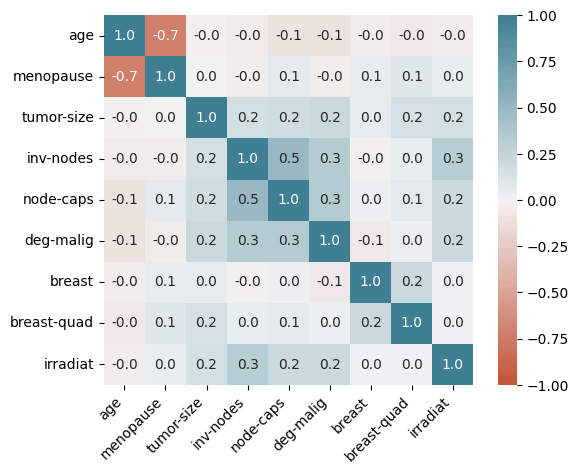

In [47]:
corr = X.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt=".1f"
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

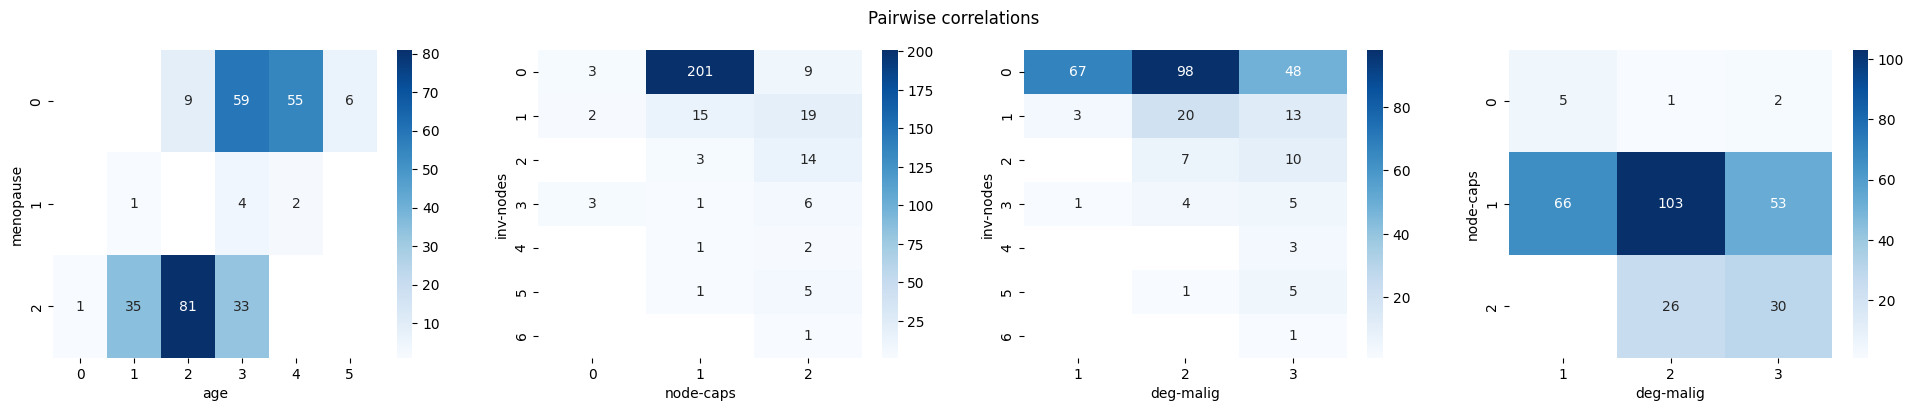

In [78]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,4))
fig.suptitle('Pairwise correlations')
# age vs menopause
df_2dhist = pd.DataFrame({
    x_label: grp['menopause'].value_counts()
    for x_label, grp in X.groupby('age')
})
sns.heatmap(df_2dhist, cmap=sns.color_palette("Blues", as_cmap=True), annot=True, ax=ax1)
ax1.set_xlabel('age')
_ = ax1.set_ylabel('menopause')

# inv-nodes vs node-caps
df_2dhist = pd.DataFrame({
    x_label: grp['inv-nodes'].value_counts()
    for x_label, grp in X.groupby('node-caps')
})
sns.heatmap(df_2dhist, cmap=sns.color_palette("Blues", as_cmap=True), annot=True, fmt=".0f", ax=ax2)
ax2.set_xlabel('node-caps')
_ = ax2.set_ylabel('inv-nodes')

# inv.-nodes vs deg-malig
df_2dhist = pd.DataFrame({
    x_label: grp['inv-nodes'].value_counts()
    for x_label, grp in X.groupby('deg-malig')
})
sns.heatmap(df_2dhist, cmap=sns.color_palette("Blues", as_cmap=True), annot=True, ax=ax3)
ax3.set_xlabel('deg-malig')
_ = ax3.set_ylabel('inv-nodes')

# node-caps vs deg-malig
df_2dhist = pd.DataFrame({
    x_label: grp['node-caps'].value_counts()
    for x_label, grp in X.groupby('deg-malig')
})
sns.heatmap(df_2dhist, cmap=sns.color_palette("Blues", as_cmap=True), annot=True, fmt=".0f", ax=ax4)
ax4.set_xlabel('deg-malig')
_ = ax4.set_ylabel('node-caps')

In [80]:
fp_data = pd.read_csv('fp_data.csv')

In [88]:
fp_data.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,central,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events


In [89]:
X.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,1,2,6,0,1,3,0,2,0
1,2,2,4,0,1,2,1,5,0
2,2,2,4,0,1,2,0,2,0
3,4,0,3,0,1,2,1,3,0
4,2,2,0,0,1,2,1,4,0
